This is Ramkishore Rao's Project - Application of Tensor Flow and Keras for Loan Dataset.  This one includes sckit learn's gridsearchCV for
hyperparameter tuning

In [2]:
import tensorflow.keras
from tensorflow . keras .models import Sequential
from tensorflow . keras . layers import Dense , Activation
from tensorflow . keras . callbacks import EarlyStopping
from sklearn . model_selection import train_test_split

In [3]:
import numpy as np
import pandas as pd
from sklearn import metrics
import sklearn
from sklearn.model_selection import train_test_split
import io
import requests
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV



In [3]:
!pip install theano

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.8 MB 8.0 MB/s 
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668111 sha256=074b638018ff2093232b61a4d8006192dc326befda5871dfc7edbdd8920e41a8
  Stored in directory: /root/.cache/pip/wheels/26/68/6f/745330367ce7822fe0cd863712858151f5723a0a5e322cc144
Successfully built theano


In [4]:
df = pd.read_csv('/content/initialmodel2.csv', on_bad_lines="skip", engine="python")


In [5]:
df.head()
len(df)

209011

In [6]:
df1 = df.pop('Defaulted')

df['Defaulted'] = df1

df.drop(['Unnamed: 0'] , axis = 1, inplace =True)

df = df.dropna()
print(df.head())



   VerificationType  LanguageCode       Age  Gender  AppliedAmount    Amount  \
0               4.0             1  0.673077     1.0       0.192041  0.192041   
1               1.0             1  0.615385     1.0       0.275145  0.275145   
2               4.0             1  0.500000     0.0       0.999810  0.854497   
3               3.0             6  0.461538     0.0       0.132681  0.132681   
4               4.0             6  0.307692     1.0       0.141704  0.093741   

   Interest  LoanDuration  MonthlyPayment  UseOfLoan  ...  Rating_F  \
0  0.053336      0.487179        0.026198          2  ...         0   
1  0.038358      0.487179        0.035782          3  ...         0   
2  0.024937      0.487179        0.113391          3  ...         0   
3  0.128924      0.487179        0.026822          2  ...         1   
4  0.237814      0.384615        0.042723          7  ...         0   

   Rating_HR  Rating_nan  Status_Late  Status_Repaid  Status_nan  \
0          0           0

Split dataframe into X and y

In [7]:
df = df.iloc[0:20000] # let's take a subset of the dataset as the neural net takes long to execute

In [26]:
X = df.iloc[:, :-1]
X1= df.iloc[:, :-1]

Y = df.iloc[:,-1].astype(int)

# Split into train and test

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 1, test_size = 0.2)


Split train into train1 and val1

In [27]:
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_train, y_train, random_state = 1, test_size = 0.15)


In [28]:
X = X_train.to_numpy()
y = y_train.to_numpy()

In [29]:
len(X)

16000

In [30]:
len(y)

16000

In [31]:
def create_model (optimizer = 'rmsprop', init = 'glorot_uniform'):
  model = Sequential()
  model.add(Dense(100, input_dim=X.shape[1], activation='relu',
                  kernel_initializer=init))
  model.add(Dense(50,activation='relu',kernel_initializer= init))
  model.add(Dense(25,activation='relu',kernel_initializer=init))
  model.add(Dense(1,activation='sigmoid',kernel_initializer=init))

# Compile Model 

  model.compile(loss='binary_crossentropy', 
                optimizer= optimizer,
                metrics =['accuracy'])
  return model




In [ ]:
# create model

model = KerasClassifier(build_fn = create_model, verbose = 0)

# grid search, epochs, batch size and optimizer with sckitlearn's gridsearchCV

optimizers = ['rmsprop', 'adam']
inits = ['glorot_uniform', 'normal', 'uniform']
epochs = [50, 150]
batches = [5, 20]

param_grid = dict(optimizer = optimizers, epochs = epochs, batch_size = batches, init = inits)
grid = GridSearchCV(estimator = model, param_grid = param_grid, cv =3)
grid_result = grid.fit(X,y)

# summarize results

print("Best %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip (means, stds, params):
  print("%f (%f) with %r" % (mean, stdev, param))



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  This is separate from the ipykernel package so we can avoid doing imports until


Best 0.930312 using {'batch_size': 5, 'epochs': 150, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.875499 (0.014060) with {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.903563 (0.001420) with {'batch_size': 5, 'epochs': 50, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.858810 (0.043412) with {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'rmsprop'}
0.907875 (0.005120) with {'batch_size': 5, 'epochs': 50, 'init': 'normal', 'optimizer': 'adam'}
0.875438 (0.011266) with {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'rmsprop'}
0.905687 (0.002813) with {'batch_size': 5, 'epochs': 50, 'init': 'uniform', 'optimizer': 'adam'}
0.901562 (0.002377) with {'batch_size': 5, 'epochs': 150, 'init': 'glorot_uniform', 'optimizer': 'rmsprop'}
0.930312 (0.005291) with {'batch_size': 5, 'epochs': 150, 'init': 'glorot_uniform', 'optimizer': 'adam'}
0.906500 (0.004245) with {'batch_size': 5, 'epochs': 150, 'init': 'normal', 'optimiz

In [ ]:
# run model with best parameters from sckit learn's gridsearchCV

In [32]:
best_model = Sequential()
best_model.add(Dense(100, input_dim=X.shape[1], activation='relu',
                  kernel_initializer='glorot_uniform'))
best_model.add(Dense(50,activation='relu',kernel_initializer= 'glorot_uniform'))
best_model.add(Dense(25,activation='relu',kernel_initializer='glorot_uniform'))
best_model.add(Dense(1,activation='sigmoid',kernel_initializer='glorot_uniform'))

best_model.compile(loss='binary_crossentropy', 
                optimizer= tensorflow.keras.optimizers.Adam(),
                metrics =['accuracy'])

best_model.fit(X ,  y, epochs = 150, batch_size = 5)

Epoch 1/150
3200/3200 [==============================] - 6s 2ms/step - loss: 0.9604 - accuracy: 0.7287
Epoch 2/150
3200/3200 [==============================] - 7s 2ms/step - loss: 0.4449 - accuracy: 0.7961
Epoch 3/150
3200/3200 [==============================] - 7s 2ms/step - loss: 0.3990 - accuracy: 0.8027
Epoch 4/150
3200/3200 [==============================] - 11s 3ms/step - loss: 0.4147 - accuracy: 0.7755
Epoch 5/150
3200/3200 [==============================] - 5s 2ms/step - loss: 0.3327 - accuracy: 0.8088
Epoch 6/150
3200/3200 [==============================] - 5s 2ms/step - loss: 0.3164 - accuracy: 0.8344
Epoch 7/150
3200/3200 [==============================] - 5s 2ms/step - loss: 0.3052 - accuracy: 0.8407
Epoch 8/150
3200/3200 [==============================] - 6s 2ms/step - loss: 0.3063 - accuracy: 0.8397
Epoch 9/150
3200/3200 [==============================] - 5s 2ms/step - loss: 0.3011 - accuracy: 0.8424
Epoch 10/150
3200/3200 [==============================] - 5s 2ms/step - 

Predictions from Best Model Provided Below

In [ ]:
pred = best_model.predict(X_test)
pred

array([[1.        ],
       [1.        ],
       [1.        ],
       ...,
       [0.95793664],
       [0.56782025],
       [0.8158236 ]], dtype=float32)

In [ ]:
mse2 = mean_squared_error(pred, y_test, squared=False)

In [ ]:
mse2

0.24920588492390586

In [ ]:
pred1 = np.round(pred) # this takes continues output and transforms to binary values of 0 and 1
pred1.shape

(4000, 1)

In [ ]:
pred1 # this is the output target value array for the test dataset

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
accuracy1 = accuracy_score(y_test, pred1)
precision1 = precision_score(y_test, pred1)
recall1 = recall_score(y_test, pred1)
F1_score = f1_score(y_test, pred1)
confusion_mat_test = confusion_matrix(y_test, pred1)

In [ ]:
confusion_mat_test

array([[ 630,  308],
       [  44, 3018]])

In [ ]:
accuracy1

0.912

In [ ]:
precision1

0.9073962717979555

In [ ]:
recall1

0.9856303069888962

In [ ]:
F1_score

0.9448966812773951

In [ ]:
auc= roc_auc_score(y_test, pred)

print(auc)

0.9795068582625734


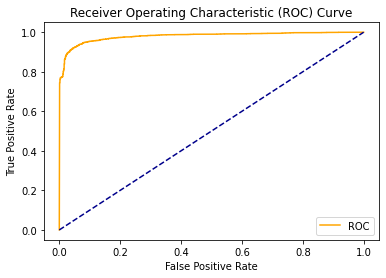

In [ ]:
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
    
probs = best_model.predict(X_test)
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_curve(fper, tper)

In [ ]:
# Save Neural Network to JSON File

In [14]:
from keras.models import model_from_json

In [ ]:
# Serialize model to JSON

In [33]:
best_tuned_model_json = best_model.to_json()

with open("model.json" , "w") as json_file:
  json_file.write(best_tuned_model_json)

# Serialize weights to HDF5

best_model.save_weights("best_model.h5")
print("Saved Model to Disk")

Saved Model to Disk


In [ ]:
# Load json and create model

In [15]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()

loaded_model = model_from_json(loaded_model_json)


# Load weights into new Model


loaded_model.load_weights("best_model.h5")
print("Loaded model from disk")


Loaded model from disk


In [ ]:
# Evaluate Loaded Model on Test Data

In [16]:
loaded_model.compile(loss='binary_crossentropy', 
                optimizer= tensorflow.keras.optimizers.Adam(),
                metrics =['accuracy'])

score = loaded_model.evaluate(X_test, y_test, verbose = 0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 91.20%


In [60]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 6.4 MB/s 
     |████████████████████████████████| 930 kB 56.3 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [34]:
print(loaded_model.layers[0].weights[0].shape)

list1 = []

for x in loaded_model.layers[0].weights[0]:
  a = (np.sum(abs(x)))
  a = np.round(a,2)
  list1.append(a)

array1 = np.array(list1)

X1 = X1.columns
X1 = X1.tolist()
list2 =[]

for i in range(len(X1)):
  list2.append((list1[i], X1[i]))

print (list2)


(71, 100)
[(13.04, 'VerificationType'), (18.3, 'LanguageCode'), (25.21, 'Age'), (15.79, 'Gender'), (31.0, 'AppliedAmount'), (50.31, 'Amount'), (95.41, 'Interest'), (28.63, 'LoanDuration'), (42.69, 'MonthlyPayment'), (15.69, 'UseOfLoan'), (13.24, 'Education'), (14.28, 'MaritalStatus'), (16.56, 'EmploymentStatus'), (11.72, 'OccupationArea'), (16.18, 'HomeOwnershipType'), (17.15, 'IncomeFromPrincipalEmployer'), (25.62, 'IncomeFromPension'), (32.97, 'IncomeFromFamilyAllowance'), (26.37, 'IncomeFromSocialWelfare'), (42.59, 'IncomeFromLeavePay'), (33.34, 'IncomeFromChildSupport'), (49.77, 'IncomeOther'), (20.35, 'IncomeTotal'), (20.39, 'ExistingLiabilities'), (13.85, 'LiabilitiesTotal'), (19.08, 'RefinanceLiabilities'), (26.45, 'DebtToIncome'), (22.0, 'FreeCash'), (20.53, 'MonthlyPaymentDay'), (143.05, 'PlannedInterestTillDate'), (60.58, 'ExpectedLoss'), (28.47, 'LossGivenDefault'), (25.08, 'ExpectedReturn'), (44.56, 'ProbabilityOfDefault'), (817.64, 'PrincipalOverdueBySchedule'), (33.06, 'M

/usr/local/lib/python3.7/dist-packages/numpy/lib/npyio.py:1378: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.asarray(X)


,coef,more_imp
diff_days,8.250000,False
ActiveScheduleFirstPaymentReached_nan,9.080000,False
Restructured_nan,9.370000,False
EmploymentDurationCurrentEmployer_nan,9.400000,False
EmploymentDurationCurrentEmployer_Other,9.430000,False
...,...,...
PlannedInterestTillDate,143.050003,True
PrincipalPaymentsMade,150.610001,True
Status_Late,263.850006,True
InterestAndPenaltyPaymentsMade,383.970001,True


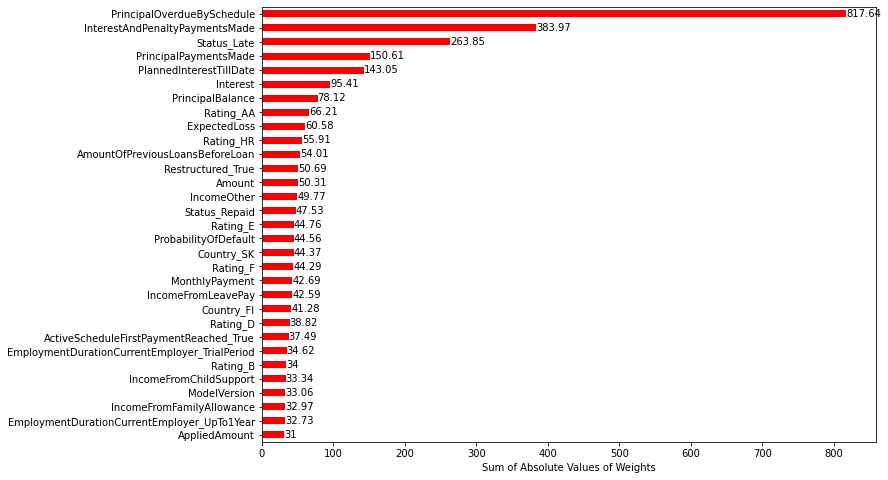

In [44]:
def report_coef(names, coef):
    r = pd.DataFrame( { 'coef': coef, 'more_imp': coef>=30  }, index = names )
    r = r.sort_values(by=['coef'])
    r.to_csv("BestModelNeuralNet.csv")
    display(r)
   
    data_range = r[(r['coef'] >=30 )]
    ax = data_range['coef'].plot(kind='barh', color=data_range['more_imp'].map(
        {True: 'r', False: 'b'}), figsize=(11, 8))
    
    for container in ax.containers:
        ax.bar_label(container)
    
    plt.xlabel("Sum of Absolute Values of Weights")

    
report_coef(
  X1,
  array1) 

In [38]:
# Let's look at history of training errors in the best_model retraining

In [52]:
!pip install plot_keras_history
from plot_keras_history import show_history, plot_history
print(best_model.history)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [55]:
print(best_model.history.history.keys())

dict_keys(['loss', 'accuracy'])


Text(0.5, 1.0, 'Model Accuracy')

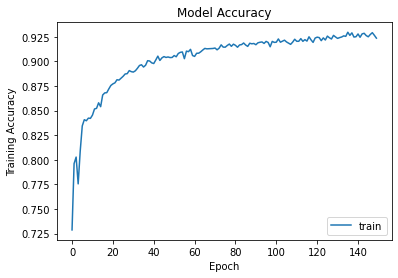

In [65]:
plt.plot(best_model.history.history['accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Training Accuracy")
plt.legend(['train'], loc = 'lower right')
plt.title("Model Accuracy")


Text(0.5, 1.0, 'Model Loss')

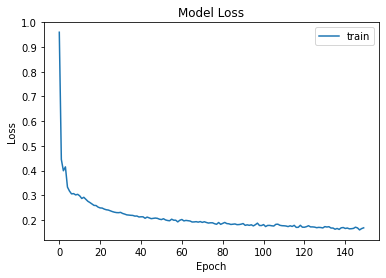

In [66]:
plt.plot(best_model.history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train'], loc = 'upper right')
plt.title("Model Loss")